In [1]:
%matplotlib notebook

In [2]:
from py4xs.local import ExpPara
from py4xs.data2d import Data2d,Axes2dPlot,DataType
import numpy as np
import pylab as plt
import matplotlib as mpl

In [3]:
ew = ExpPara(1042, 1042) 

ew.wavelength = 0.886
ew.bm_ctr_x = 27 # was 5
ew.bm_ctr_y = 1039 # was 1015
ew.ratioDw = 2.52
ew.det_orient = 45
ew.det_tilt = -17
ew.det_phi = 0
ew.grazing_incident = True  
ew.flip = -3
ew.incident_angle = 0.6   
ew.sample_normal = 0.25   

ew.calc_rot_matrix()
ew.init_coordinates()

In [4]:
dgid = Data2d('data/no36-sth_0.6_WAXS')
dxr = Data2d('data/no36-sth_-0.5_10_WAXS')
dgid.set_exp_para(ew)
dxr.set_exp_para(ew)

In [5]:
dgid.conv_Iqrqz(1000, 1000)

<IPython.core.display.Javascript object>


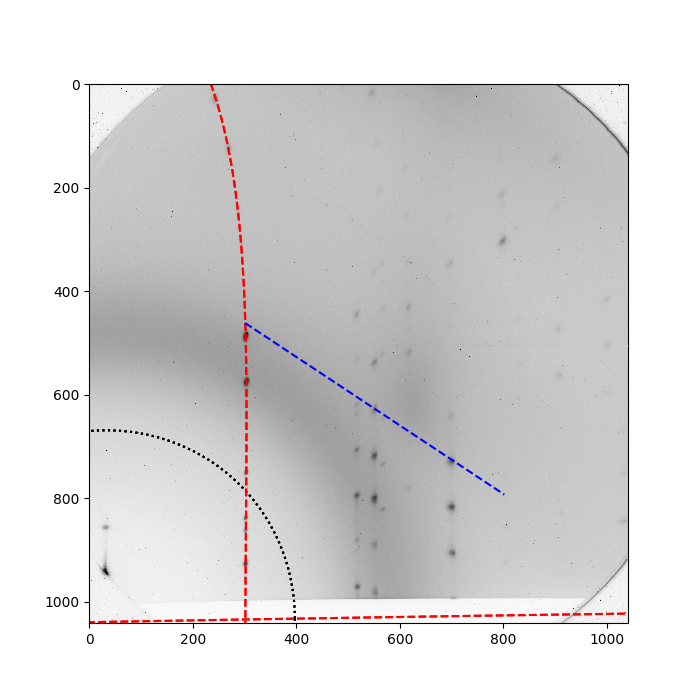

In [6]:
plt.figure(figsize=(7,7))
ax = plt.gca()
paxr = Axes2dPlot(ax, dgid.data, exp=ew)
paxr.coordinate_translation = "xy2qrqz"
paxr.plot(log=True)
paxr.img.set_clim(950,15000)
paxr.set_color_scale(mpl.cm.gist_yarg)
paxr.mark_coords([1.0], [], "k:", DataType.q)
paxr.mark_coords([0.738], [0], "r--", DataType.qrqz)

t = np.linspace(-300, 300, 2)
(x0,y0) = (551.6, 627.5)
ang = -33.5
paxr.mark_line(x0+t*np.cos(np.radians(ang)), y0-t*np.sin(np.radians(ang)), "b--")

plt.show()

<IPython.core.display.Javascript object>


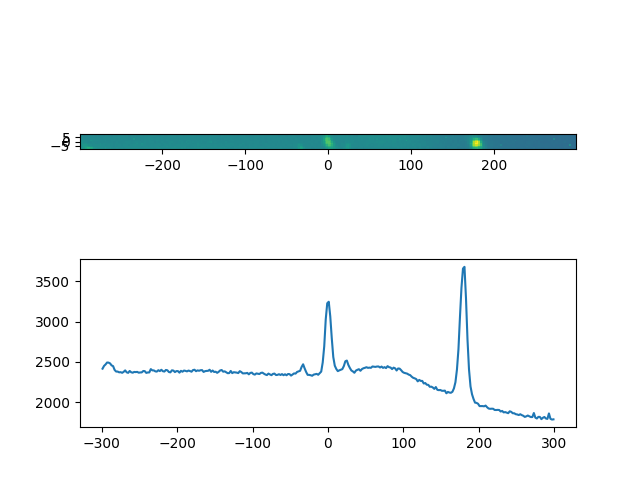

In [7]:
lcut = dgid.data.line_cut(x0, y0, ang, 300, 10, 301, 11)

plt.figure()
plt.subplot(211)
ax = plt.gca()
paxr = Axes2dPlot(ax,lcut)
paxr.plot()
paxr.img.set_clim(0,5000)
plt.subplot(212)
plt.plot(lcut.xc, lcut.flatten(axis=0))
plt.show()

<IPython.core.display.Javascript object>


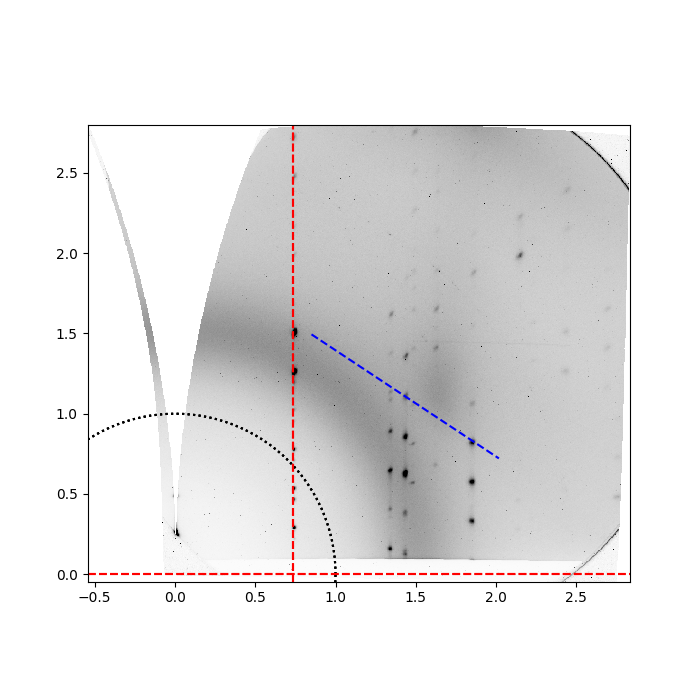

In [8]:
plt.figure(figsize=(7,7))
ax = plt.gca()
paxr = Axes2dPlot(ax, dgid.qrqz_data, exp=ew)
paxr.plot()
paxr.img.set_clim(950,5000)
paxr.set_color_scale(mpl.cm.gist_yarg)
# if the second list of coordinates is omitted, the rest of the arguments must be specified
paxr.mark_coords([1.0], fmt="k:", datatype=DataType.q)    
paxr.mark_coords([0.738], [0], "r--", DataType.qrqz)

t = np.linspace(-0.7, 0.7, 101)
(x0,y0) = (1.434, 1.108)
ang = -33.5
paxr.mark_line(x0+t*np.cos(np.radians(ang)), y0+t*np.sin(np.radians(ang)), "b--")

plt.show()

<IPython.core.display.Javascript object>


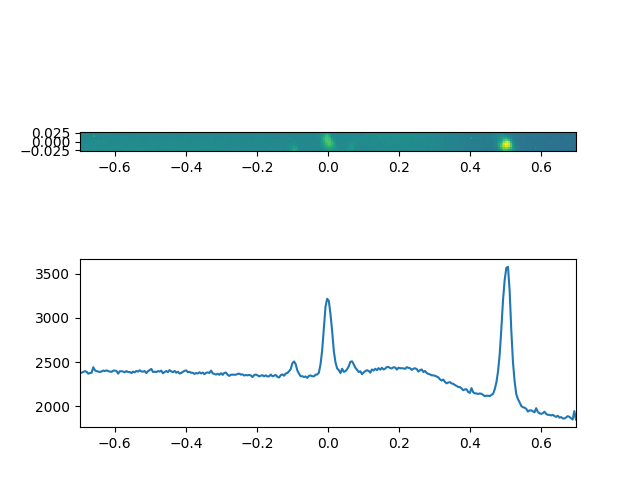

In [9]:
lcut = dgid.qrqz_data.line_cut(x0, y0, ang, 0.7, 0.03, 301, 11)

plt.figure()
plt.subplot(211)
ax = plt.gca()
paxr = Axes2dPlot(ax,lcut)
paxr.plot()
paxr.img.set_clim(0,5000)
plt.subplot(212)
plt.plot(lcut.xc, lcut.flatten(axis=0))
plt.xlim([lcut.xc[0], lcut.xc[-1]])
plt.show()

<IPython.core.display.Javascript object>


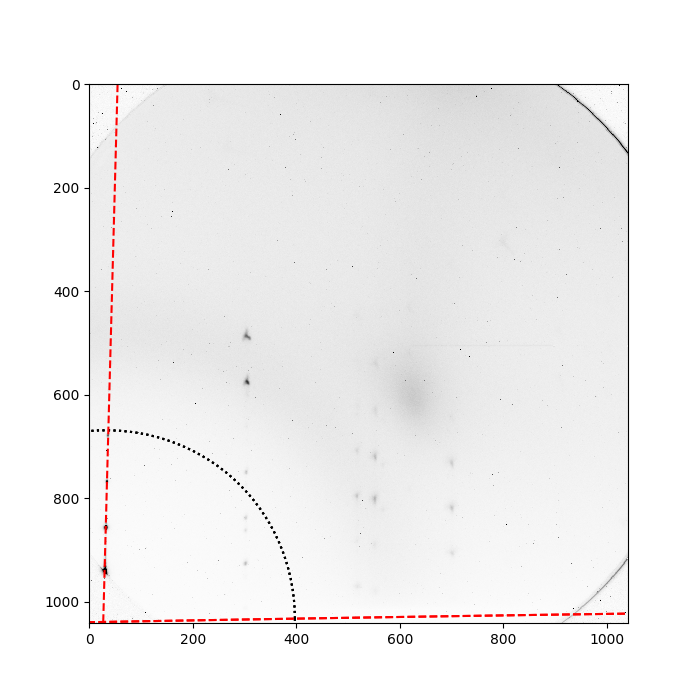

In [10]:
plt.figure(figsize=(7,7))
ax = plt.gca()
paxr = Axes2dPlot(ax, dxr.data, exp=ew)
paxr.coordinate_translation = "xy2qphi"
paxr.plot()
paxr.img.set_clim(950,5000)
paxr.set_color_scale(mpl.cm.gist_yarg)
paxr.mark_coords([1.0], [], "k:", DataType.q)
paxr.mark_coords([], [0], "r--", DataType.qrqz)
paxr.mark_coords([], [90.], "r--", DataType.qphi)


In [11]:
dxr.conv_Iqphi(500, 500)

<IPython.core.display.Javascript object>


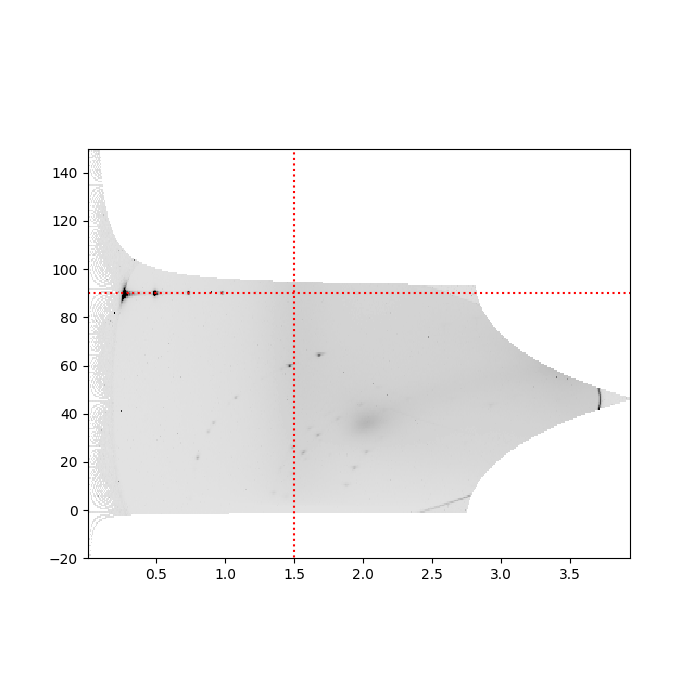

In [12]:
plt.figure(figsize=(7,7))
ax = plt.gca()
paxr = Axes2dPlot(ax, dxr.qphi_data, exp=ew)
paxr.plot(aspect=np.radians(1.))
paxr.img.set_clim(500,5000)
paxr.set_color_scale(mpl.cm.gist_yarg)
paxr.mark_coords([1.5], [90.], "r:", DataType.qphi)
plt.ylim([-20, 150])

plt.show()

/home/lyang/pro/pyXS2017/py4xs/data2d.py:135: RuntimeWarning: invalid value encountered in true_divide
  ret.d = np.fliplr(v_map/c_map).T


<IPython.core.display.Javascript object>


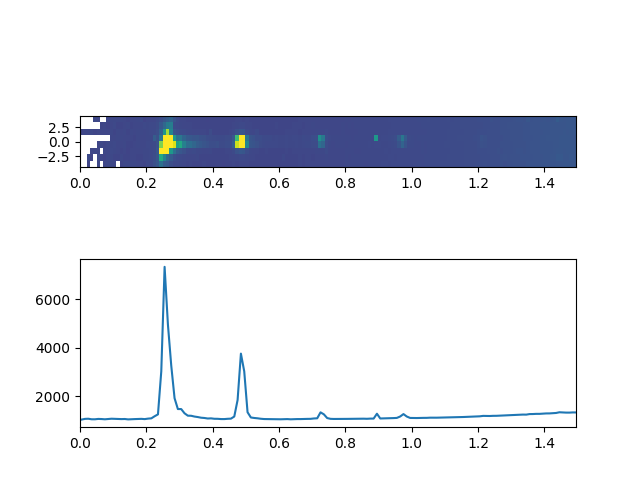

In [13]:
lcut = dxr.qphi_data.line_cut(0, 90, 0, 1.5, 5, 301, 9)

plt.figure()
plt.subplot(211)
ax = plt.gca()
paxr = Axes2dPlot(ax,lcut)
paxr.plot(aspect=np.radians(1.))
paxr.img.set_clim(0,5000)
plt.xlim([0, lcut.xc[-1]])

plt.subplot(212)
plt.plot(lcut.xc, lcut.flatten(axis=0))
plt.xlim([0, lcut.xc[-1]])
#plt.xlim([lcut.xc[0], lcut.xc[-1]])
plt.show()